## USE PRA ENV

In [1]:
45

45

In [2]:
import netCDF4 as nc
import numpy as np 
import pandas as pd
print("all lib are loaded")

all lib are loaded


In [3]:
df = nc.Dataset('reanalysis.nc')

In [4]:
print(df)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2024-02-28 14:57:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data2/adaptor.mars.internal-1709132203.204922-3085-1-7d460dd7-0a58-49d2-a5ce-3ef6a4c1aa09.nc /cache/tmp/7d460dd7-0a58-49d2-a5ce-3ef6a4c1aa09-adaptor.mars.internal-1709130936.267606-3085-1-tmp.grib
    dimensions(sizes): longitude(9), latitude(9), level(27), time(122)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 level(level), int32 time(time), int16 z(time, level, latitude, longitude), int16 r(time, level, latitude, longitude), int16 t(time, level, latitude, longitude), int16 u(time, level, latitude, longitude), int16 v(time, level, latitude, longitude)
    groups: 


In [5]:
print(df.variables)

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (9,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (9,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'level': <class 'netCDF4._netCDF4.Variable'>
int32 level(level)
    units: millibars
    long_name: pressure_level
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of -2147483647 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (122,)
filling on, default _FillValue of -2147483647 used, 'z': <class 'netCDF4._netCDF4.Variable'>
int16 z(time, level, latitude, long

In [6]:
df.dimensions

{'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 9,
 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 9,
 'level': <class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 27,
 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 122}

In [7]:
temp = df.variables['t']
print(temp.shape)
print(temp)

(122, 27, 9, 9)
<class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0017657643564507814
    add_offset: 247.06209776967725
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Temperature
    standard_name: air_temperature
unlimited dimensions: 
current shape = (122, 27, 9, 9)
filling on


In [8]:
geo = df.variables['z']
print(geo.shape)
print(geo)

(122, 27, 9, 9)
<class 'netCDF4._netCDF4.Variable'>
int16 z(time, level, latitude, longitude)
    scale_factor: 2.522314556692811
    add_offset: 81994.81892084665
    _FillValue: -32767
    missing_value: -32767
    units: m**2 s**-2
    long_name: Geopotential
    standard_name: geopotential
unlimited dimensions: 
current shape = (122, 27, 9, 9)
filling on


In [9]:
ucmp = df.variables['u']
print(ucmp.shape)
print(ucmp)

(122, 27, 9, 9)
<class 'netCDF4._netCDF4.Variable'>
int16 u(time, level, latitude, longitude)
    scale_factor: 0.001530055380689047
    add_offset: 6.637319383930749
    _FillValue: -32767
    missing_value: -32767
    units: m s**-1
    long_name: U component of wind
    standard_name: eastward_wind
unlimited dimensions: 
current shape = (122, 27, 9, 9)
filling on


In [10]:
vcmp = df.variables['v']
print(vcmp.shape)
print(vcmp)

(122, 27, 9, 9)
<class 'netCDF4._netCDF4.Variable'>
int16 v(time, level, latitude, longitude)
    scale_factor: 0.0010118833613497922
    add_offset: 4.692922097870106
    _FillValue: -32767
    missing_value: -32767
    units: m s**-1
    long_name: V component of wind
    standard_name: northward_wind
unlimited dimensions: 
current shape = (122, 27, 9, 9)
filling on


In [ ]:
spec_hum = df.variables['q']
print(temp.shape)
print(spec_hum)

In [16]:
rel_hum = df.variables['q']
print(temp.shape)
print(spec_hum)

(122, 27, 9, 9)
<class 'netCDF4._netCDF4.Variable'>
int16 r(time, level, latitude, longitude)
    scale_factor: 0.0022071275019375377
    add_offset: 70.71379740670801
    _FillValue: -32767
    missing_value: -32767
    units: %
    long_name: Relative humidity
    standard_name: relative_humidity
unlimited dimensions: 
current shape = (122, 27, 9, 9)
filling on


In [12]:
import xarray as xr

ds = xr.open_dataset("reanalysis.nc")
ds

<xarray.Dataset>
Dimensions:    (longitude: 9, latitude: 9, level: 27, time: 122)
Coordinates:
  * longitude  (longitude) float32 87.5 87.75 88.0 88.25 ... 89.0 89.25 89.5
  * latitude   (latitude) float32 23.5 23.25 23.0 22.75 ... 22.0 21.75 21.5
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-03-01 2015-03-02 ... 2015-06-30
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-28 14:57:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [13]:
ds["z"]

<xarray.DataArray 'z' (time: 122, level: 27, latitude: 9, longitude: 9)>
[266814 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 87.5 87.75 88.0 88.25 ... 89.0 89.25 89.5
  * latitude   (latitude) float32 23.5 23.25 23.0 22.75 ... 22.0 21.75 21.5
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-03-01 2015-03-02 ... 2015-06-30
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [ ]:
ds["q"]

In [15]:
ds["r"]

<xarray.DataArray 'r' (time: 122, level: 27, latitude: 9, longitude: 9)>
[266814 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 87.5 87.75 88.0 88.25 ... 89.0 89.25 89.5
  * latitude   (latitude) float32 23.5 23.25 23.0 22.75 ... 22.0 21.75 21.5
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-03-01 2015-03-02 ... 2015-06-30
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [17]:
ds["t"]

<xarray.DataArray 't' (time: 122, level: 27, latitude: 9, longitude: 9)>
[266814 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 87.5 87.75 88.0 88.25 ... 89.0 89.25 89.5
  * latitude   (latitude) float32 23.5 23.25 23.0 22.75 ... 22.0 21.75 21.5
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-03-01 2015-03-02 ... 2015-06-30
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [18]:
ds["u"]

<xarray.DataArray 'u' (time: 122, level: 27, latitude: 9, longitude: 9)>
[266814 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 87.5 87.75 88.0 88.25 ... 89.0 89.25 89.5
  * latitude   (latitude) float32 23.5 23.25 23.0 22.75 ... 22.0 21.75 21.5
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-03-01 2015-03-02 ... 2015-06-30
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [19]:
ds["v"]

<xarray.DataArray 'v' (time: 122, level: 27, latitude: 9, longitude: 9)>
[266814 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 87.5 87.75 88.0 88.25 ... 89.0 89.25 89.5
  * latitude   (latitude) float32 23.5 23.25 23.0 22.75 ... 22.0 21.75 21.5
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-03-01 2015-03-02 ... 2015-06-30
Attributes:
    units:          m s**-1
    long_name:      V component of wind
    standard_name:  northward_wind

## CHATGPT

In [20]:
import xarray as xr
import pandas as pd

# Load the netCDF data into an xarray dataset
ds = xr.open_dataset('reanalysis.nc')

# Convert xarray dataset to pandas DataFrame
df = ds.to_dataframe().reset_index()

# Display the DataFrame
print(df.head())


   longitude  latitude  level       time              z          r  \
0       87.5      23.5    100 2015-03-01  161354.406250  31.356304   
1       87.5      23.5    100 2015-03-02  161558.718750  54.098541   
2       87.5      23.5    100 2015-03-03  161750.406250  70.305481   
3       87.5      23.5    100 2015-03-04  161737.796875  49.267143   
4       87.5      23.5    100 2015-03-05  161800.843750  36.576160   

            t          u          v  
0  198.148666  29.350992  11.406769  
1  195.222794  24.262028   3.660801  
2  193.391693  26.431646   1.130081  
3  193.947906  22.918640  -1.913664  
4  195.397614  14.185083   1.849530  


In [3]:
import xarray as xr

# Open the netCDF dataset
ds = xr.open_dataset("reanalysis.nc")

# Select a subset of the data based on time, for example, the first 100 time steps
subset_ds = ds.isel(time=slice(0, 100))

# Convert xarray dataset to pandas DataFrame
df = subset_ds.to_dataframe().reset_index()

# Display the subset DataFrame
print(df.head())


   longitude  latitude  level       time             z         q           t  \
0       60.0      40.0    100 2015-03-01  158600.87500  0.000003  213.238617   
1       60.0      40.0    100 2015-03-02  158221.18750  0.000003  217.556030   
2       60.0      40.0    100 2015-03-03  158028.75000  0.000003  217.018448   
3       60.0      40.0    100 2015-03-04  157571.03125  0.000003  216.932693   
4       60.0      40.0    100 2015-03-05  157295.37500  0.000003  216.512238   

           u         v  
0   7.824395 -7.322860  
1  10.296048 -0.330059  
2  18.361088  0.098188  
3  18.796730  0.286617  
4  17.322767 -0.360512  


In [21]:
total_records = len(df)

# Display the total number of records
print(f"Total number of records in the dataset: {total_records}")

Total number of records in the dataset: 266814


Total slices which can be made

In [22]:
import xarray as xr

# Open the netCDF dataset
ds = xr.open_dataset("reanalysis.nc")

# Get the total number of time steps in the dataset
total_time_steps = ds.sizes['time']

# Define the size of each slice
slice_size = 100

# Calculate the total number of slices
total_slices = total_time_steps // slice_size

print(f"Total number of slices: {total_slices}")


Total number of slices: 1


In [23]:
import xarray as xr

# Open the netCDF dataset
ds = xr.open_dataset("reanalysis.nc")

# Get the total number of time steps in the dataset
total_time_steps = ds.sizes['time']

# Define the size of each slice
slice_size = 100

# Calculate the total number of slices
total_slices = total_time_steps // slice_size

# List to store slices
slices = []

# Loop through the dataset and create slices
for i in range(total_slices):
    start_idx = i * slice_size
    end_idx = (i + 1) * slice_size
    subset_ds = ds.isel(time=slice(start_idx, end_idx))
    slices.append(subset_ds)

# Handle any remaining data after the last complete slice
if total_time_steps % slice_size != 0:
    start_idx = total_slices * slice_size
    subset_ds = ds.isel(time=slice(start_idx, None))
    slices.append(subset_ds)

# Print the total number of slices
print(f"Total number of slices: {len(slices)}")

# Access slices, for example, the first slice
first_slice = slices[0]
print(first_slice)


Total number of slices: 2
<xarray.Dataset>
Dimensions:    (longitude: 9, latitude: 9, level: 27, time: 100)
Coordinates:
  * longitude  (longitude) float32 87.5 87.75 88.0 88.25 ... 89.0 89.25 89.5
  * latitude   (latitude) float32 23.5 23.25 23.0 22.75 ... 22.0 21.75 21.5
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-03-01 2015-03-02 ... 2015-06-08
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-28 14:57:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [8]:
# Convert the first slice to pandas DataFrame
first_slice = slices[0].to_dataframe().reset_index()

# Rename the columns to match the actual variable names
column_mapping = {
    'geopotential': 'z',
    'specific_humidity': 'q',
    'temperature': 't',
    'u_component_of_wind': 'u',
    'v_component_of_wind': 'v'
}

first_slice.rename(columns=column_mapping, inplace=True)

# Display the first slice DataFrame
print(first_slice.head())

# Perform EDA on the DataFrame
# ... your EDA code here ...


   longitude  latitude  level       time             z         q           t  \
0       60.0      40.0    100 2015-03-01  158600.87500  0.000003  213.238617   
1       60.0      40.0    100 2015-03-02  158221.18750  0.000003  217.556030   
2       60.0      40.0    100 2015-03-03  158028.75000  0.000003  217.018448   
3       60.0      40.0    100 2015-03-04  157571.03125  0.000003  216.932693   
4       60.0      40.0    100 2015-03-05  157295.37500  0.000003  216.512238   

           u         v  
0   7.824395 -7.322860  
1  10.296048 -0.330059  
2  18.361088  0.098188  
3  18.796730  0.286617  
4  17.322767 -0.360512  


In [37]:
import xarray as xr

# Open the netCDF dataset
ds = xr.open_dataset("open with pra enviromanet/reanalysis.nc")

# Print the variable names in the dataset
print(ds.variables)


Frozen({'longitude': <xarray.IndexVariable 'longitude' (longitude: 9)>
array([87.5 , 87.75, 88.  , 88.25, 88.5 , 88.75, 89.  , 89.25, 89.5 ],
      dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 9)>
array([23.5 , 23.25, 23.  , 22.75, 22.5 , 22.25, 22.  , 21.75, 21.5 ],
      dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude, 'level': <xarray.IndexVariable 'level' (level: 27)>
array([ 100,  125,  150,  175,  200,  225,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  775,  800,  825,  850,  875,  900,  925,
        950,  975, 1000])
Attributes:
    units:      millibars
    long_name:  pressure_level, 'time': <xarray.IndexVariable 'time' (time: 122)>
array(['2015-03-01T00:00:00.000000000', '2015-03-02T00:00:00.000000000',
       '2015-03-03T00:00:00.000000000', '2015-03-04T00:00:00.000000000',
       '2015-03-05T00:00:00.000000000', '2015-0

In [38]:
import xarray as xr
import pandas as pd

# Open the netCDF dataset
ds = xr.open_dataset("reanalysis.nc")

# Convert xarray dataset to pandas DataFrame
df = ds.to_dataframe()

# Resetting the index to get a flat DataFrame
df.reset_index(inplace=True)

# Display the resulting DataFrame
print(df.head())


   longitude  latitude  level       time              z          r  \
0       87.5      23.5    100 2015-03-01  161354.406250  31.356304   
1       87.5      23.5    100 2015-03-02  161558.718750  54.098541   
2       87.5      23.5    100 2015-03-03  161750.406250  70.305481   
3       87.5      23.5    100 2015-03-04  161737.796875  49.267143   
4       87.5      23.5    100 2015-03-05  161800.843750  36.576160   

            t          u          v  
0  198.148666  29.350992  11.406769  
1  195.222794  24.262028   3.660801  
2  193.391693  26.431646   1.130081  
3  193.947906  22.918640  -1.913664  
4  195.397614  14.185083   1.849530  


In [31]:
# Define the mapping for column renaming
column_mapping = {
    'z': 'geopotential',
    'r': 'specific_humidity',
    # 'q': 'relative_humidity',
    't': 'air_temperature',
    'u': 'eastward_wind',
    'v': 'northward_wind'
}

# Rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

# Display the DataFrame with renamed columns
print(df.head())


   longitude  latitude  level       time   geopotential  relative_humidity  \
0       87.5      23.5    100 2015-03-01  161354.406250          31.356304   
1       87.5      23.5    100 2015-03-02  161558.718750          54.098541   
2       87.5      23.5    100 2015-03-03  161750.406250          70.305481   
3       87.5      23.5    100 2015-03-04  161737.796875          49.267143   
4       87.5      23.5    100 2015-03-05  161800.843750          36.576160   

   air_temperature  eastward_wind  northward_wind  
0       198.148666      29.350992       11.406769  
1       195.222794      24.262028        3.660801  
2       193.391693      26.431646        1.130081  
3       193.947906      22.918640       -1.913664  
4       195.397614      14.185083        1.849530  


EDA

In [32]:
df.shape

(266814, 9)

In [33]:
print(df.describe())


           longitude       latitude          level   geopotential  \
count  266814.000000  266814.000000  266814.000000  266814.000000   
mean       88.500000      22.500000     568.518519   59109.750000   
std         0.645498       0.645498     297.878282   50274.093750   
min        87.500000      21.500000     100.000000    -651.335938   
25%        88.000000      22.000000     250.000000   14768.201172   
50%        88.500000      22.500000     600.000000   43078.027344   
75%        89.000000      23.000000     850.000000  106395.687500   
max        89.500000      23.500000    1000.000000  164643.500000   

       relative_humidity  air_temperature  eastward_wind  northward_wind  
count      266814.000000    266814.000000  266814.000000   266814.000000  
mean           55.270790       263.717224       8.619562        2.182431  
std            29.100691        33.014542      11.470066        6.421661  
min            -1.604935       189.205078     -43.496475      -28.462446  
25%

## check later 

In [4]:
second_slice = slices[1]
print(second_slice)

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, level: 27, time: 100)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2015-06-09 2015-06-10 ... 2016-05-17
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-25 11:31:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


EDA on first Slice

In [5]:
third_slice = slices[2]
print(third_slice)

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 161, level: 27, time: 100)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 0.75 0.5 0.25 0.0
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2016-05-18 2016-05-19 ... 2017-04-25
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-25 11:31:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [11]:
import xarray as xr
import pandas as pd

# Open the netCDF dataset
ds = xr.open_dataset("reanalysis.nc")

# Get the total number of time steps in the dataset
total_time_steps = ds.sizes['time']

# Define the size of each slice
slice_size = 100

# Calculate the total number of slices
total_slices = total_time_steps // slice_size

# List to store slices
slices = []

# Loop through the dataset and create slices
for i in range(total_slices):
    start_idx = i * slice_size
    end_idx = (i + 1) * slice_size
    subset_ds = ds.isel(time=slice(start_idx, end_idx))
    slices.append(subset_ds)

# Handle any remaining data after the last complete slice
if total_time_steps % slice_size != 0:
    start_idx = total_slices * slice_size
    subset_ds = ds.isel(time=slice(start_idx, None))
    slices.append(subset_ds)

# Convert the first slice to pandas DataFrame
first_slice = slices[0].to_dataframe().reset_index()

# Rename the columns to match the actual variable names
column_mapping = {
    'geopotential': 'z',
    'specific_humidity': 'q',
    'air_temperature': 't',
    'eastward_wind': 'u',
    'northward_wind': 'v'
}

first_slice.rename(columns=column_mapping, inplace=True)

# Display the first slice DataFrame
print(first_slice.head())

# Perform EDA on the DataFrame
# ... your EDA code here ...


   longitude  latitude  level       time             z         q           t  \
0       60.0      40.0    100 2015-03-01  158600.87500  0.000003  213.238617   
1       60.0      40.0    100 2015-03-02  158221.18750  0.000003  217.556030   
2       60.0      40.0    100 2015-03-03  158028.75000  0.000003  217.018448   
3       60.0      40.0    100 2015-03-04  157571.03125  0.000003  216.932693   
4       60.0      40.0    100 2015-03-05  157295.37500  0.000003  216.512238   

           u         v  
0   7.824395 -7.322860  
1  10.296048 -0.330059  
2  18.361088  0.098188  
3  18.796730  0.286617  
4  17.322767 -0.360512  


## FIRST SLICE EDA

In [13]:
# eda of FIrst slice
summary_stats = first_slice.describe()
print(summary_stats)


          longitude      latitude         level             z             q  \
count  6.998670e+07  6.998670e+07  6.998670e+07  6.998670e+07  6.998670e+07   
mean   8.000000e+01  2.000000e+01  5.685185e+02  5.891863e+04  4.162686e-03   
std    1.161895e+01  1.161895e+01  2.978777e+02  4.981332e+04  5.214615e-03   
min    6.000000e+01  0.000000e+00  1.000000e+02 -9.547344e+02 -7.980503e-06   
25%    7.000000e+01  1.000000e+01  2.500000e+02  1.487002e+04  8.828286e-05   
50%    8.000000e+01  2.000000e+01  6.000000e+02  4.315952e+04  1.723585e-03   
75%    9.000000e+01  3.000000e+01  8.500000e+02  1.054105e+05  6.608750e-03   
max    1.000000e+02  4.000000e+01  1.000000e+03  1.642988e+05  2.504903e-02   

                  t             u             v  
count  6.998670e+07  6.998670e+07  6.998670e+07  
mean   2.620351e+02  5.258980e+00  2.799590e-01  
std    3.276345e+01  1.191201e+01  5.694982e+00  
min    1.834267e+02 -4.477104e+01 -5.205852e+01  
25%    2.320666e+02 -1.353454e+00 -2.2

In [14]:
data_types = first_slice.dtypes
missing_values = first_slice.isnull().sum()
print("Data Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)


Data Types:
longitude           float64
latitude            float64
level                 int64
time         datetime64[ns]
z                   float32
q                   float32
t                   float32
u                   float32
v                   float32
dtype: object

Missing Values:
longitude    0
latitude     0
level        0
time         0
z            0
q            0
t            0
u            0
v            0
dtype: int64


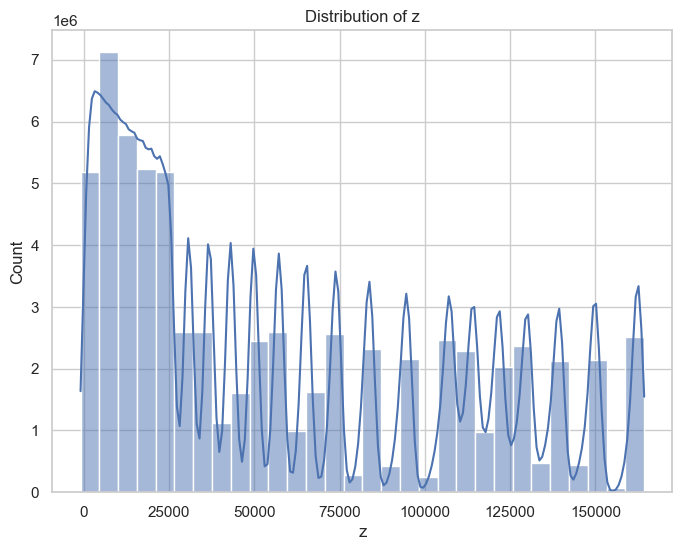

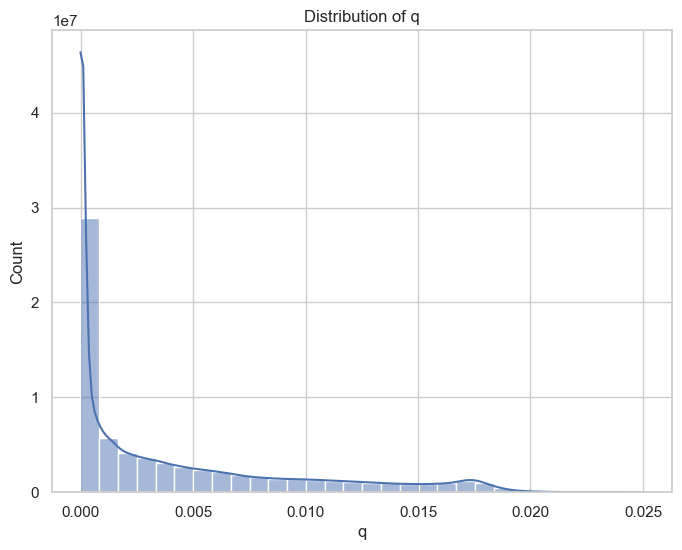

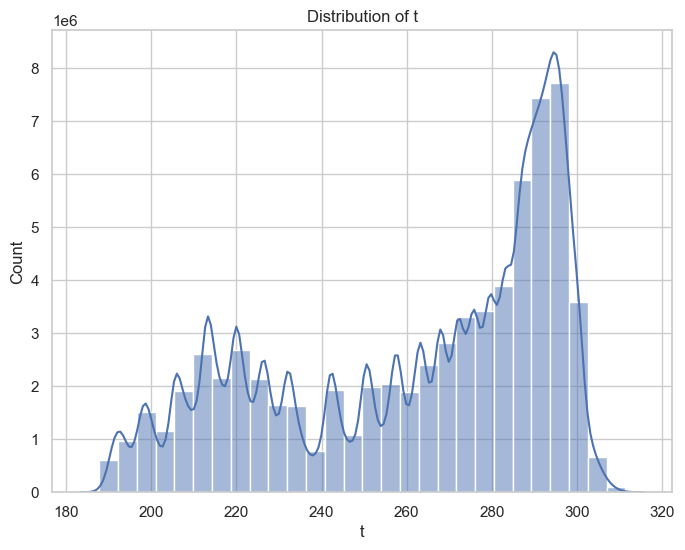

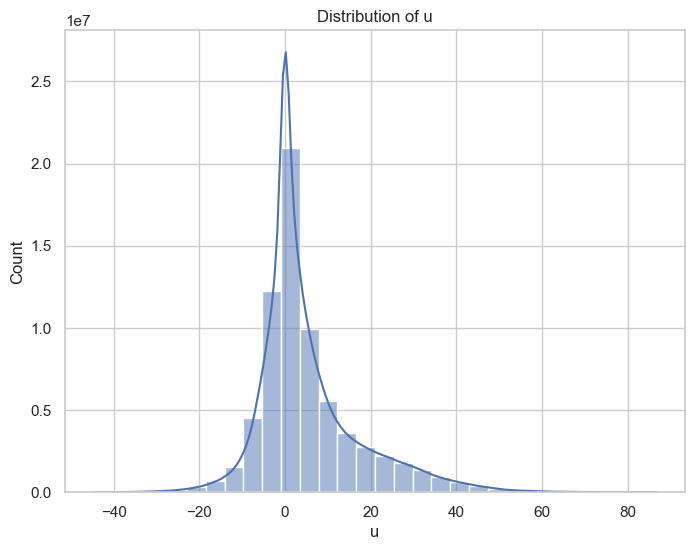

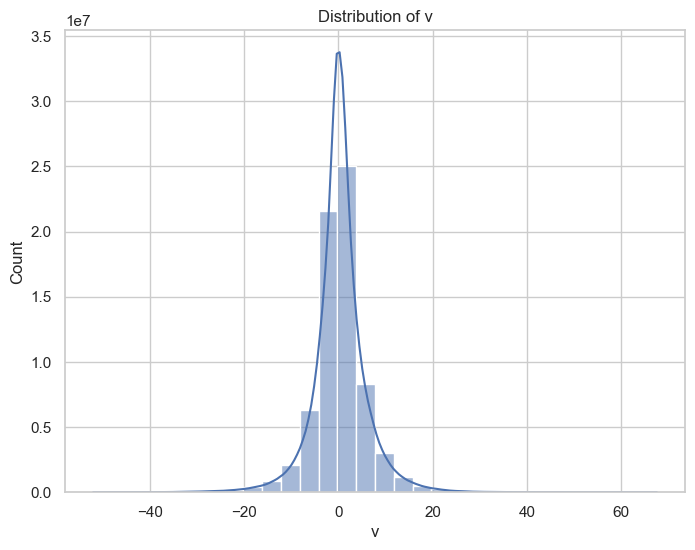

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot histograms for numerical columns
numerical_columns = ['z', 'q', 't', 'u', 'v']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=first_slice, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


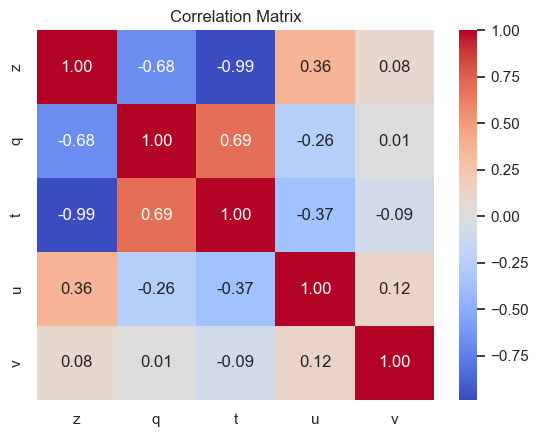

In [16]:
correlation_matrix = first_slice[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
 